# Orthodox Monetarism

### Equation of Exchange

$MV \equiv Py$

#### Reference graphs of money supply and demand and of aggregate demand and aggregate supply

If we take as given that $y$ fundamentally influenced by supply-side factors in the long-run, it is reasonable to see aggregate demand factors as influencing the value of nominal income through long-run adjustments int he price level. This was, in part the logic of the quantity theory. Changes in $M$ translate to proportional changes in $P$. We can view this a few ways. Obviously, increases in $M$ translate to increases in $P$. If velocity is stable over the long-run, we should also see that increases in M translate to increase in total expenditures, $Py$. Part of the reason for this is that, absent changes in $M$ and $V$, increases in $y$ promote a reduction in $P$. Thus, internal dynamics between $P$ and $y$ can be controlled for by including both variables and comparing to $M$.

### Logged and Dynamic Equation of Exchange and Inflation

We can derive the dynamic form of the equation of exchange by taking the logged values of the variables and taking the time derivative.

$MV \equiv PY$

$ln(MV) = ln(Py)$

$ln(M) + ln(V) = ln(P) + ln(y)$

$\frac{dlnM}{dt} + \frac{dlnV}{dt} \approx \frac{dlnP}{dt} + \frac{dlny}{dt}$

$\frac{dM}{M} + \frac{dV}{V} \approx \frac{dP}{P} + \frac{dy}{y}$


$\% \Delta P + \% \Delta y \approx \% \Delta M + \% \Delta  V$  

Recall that the quantity theory, if we interpret this as the assertion that velocity and income are constant, takes the form:

$\% \Delta V = 0$ and $\% \Delta y = 0$

However, this form is a bit extreme because we know that 1) $y$ tends to grow at some positive rate and 2) that while $\Delta V=0$ on average, there can be periods where the rate of change of velocity is significantly different than 0. We can at least resolve issue 1) by relating changes in M to changes in $Py$. If velocity is at least relatively stable, discrepancies between changes in $M$ and changes in $Py$ should be transitory.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
def gather_data(data_codes, start, end = datetime.datetime.today(), freq = "A"):
    i = 0
    # dct.items() calls key and value that key points to
    for key, val in data_codes.items():
        if i == 0:
            # Create dataframe for first variable, then rename column
            df = web.DataReader(val, "fred", start, end).resample(freq).mean()
            df.rename(columns = {val:key}, inplace = True) 
            i = None
        else:
            # If dataframe already exists, add new column
            df[key] = web.DataReader(val, "fred", start, end).resample(freq).mean()

    return df

In [2]:
data_dict = {"Nominal GDP":"GDP",
             "Real GDP":"GDPC1",
             
             "$CPI_{Urban}$":"CPIAUCNS",
             "10 Year UST Rate": "DGS10",
#              "Effective Federal Funds Rate": "DFF",
#              "Total Base": "BOGMBASE",
             "Currency in Circulation":"WCURCIR",
#              "Unemployment Rate":"UNRATE",
            "$CPI_{Urban}$":"CPIAUCNS",}
#             "VIX":"VIXCLS"}
diff = 1
freq = "Q"
start = datetime.datetime(1984, 1, 1)
# end = datetime.datetime(1985, 12, 31)
end =datetime.datetime.today()
data = {}
data["Level"] = gather_data(data_dict, start, 
          end = end, freq = freq)
data["Level"]["$V_C$"] = data["Level"]["Nominal GDP"].div(data["Level"]["Currency in Circulation"])
# data["Level"]["VIX Sq"] = data["Level"]["VIX"].pow(2)
# data["Level"]["Excess Base"] = data["Level"]["Total Base"].sub(data["Level"]["Currency in Circulation"])

C:\Users\JLCat\AppData\Local\Temp\ipykernel_30472\494823290.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 90)
C:\Users\JLCat\AppData\Local\Temp\ipykernel_30472\494823290.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,1) for y in ax.get_yticks()], color = "C0")
C:\Users\JLCat\AppData\Local\Temp\ipykernel_30472\494823290.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([round(y,1) for y in ax2.get_yticks()], color = "C1")


Text(2000-03-31, 6.352604603731343, '\n\nCPI')

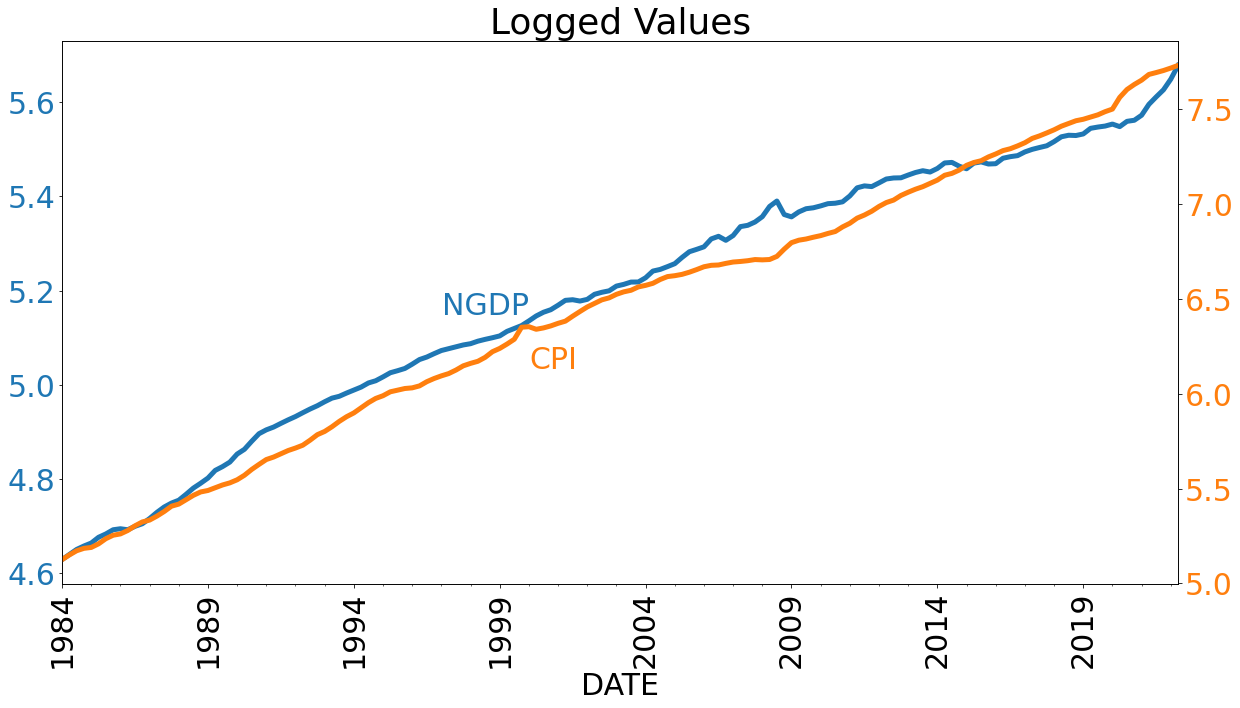

In [3]:
plt.rcParams.update({"font.size" : 30})
plot_vars = ["$CPI_{Urban}$",
            "Currency in Circulation"]
plot_df = np.log(data["Level"][plot_vars])
fig, ax = plt.subplots(figsize = (20,10))
var1, var2 = plot_vars[0], plot_vars[1]
plot_df[[var1]].plot.line(ax = ax,
                                    legend = False,
                                 linewidth = 5)
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
ax.set_title("Logged Values")
ax2 = ax.twinx()
plot_df[[var2]].plot.line(ax = ax2,
                                  legend = False,
                                  color = "C1",
                                 linewidth = 5)
ax.set_yticklabels([round(y,1) for y in ax.get_yticks()], color = "C0")
ax2.set_yticklabels([round(y,1) for y in ax2.get_yticks()], color = "C1")
date = "2000-03-31"

ax.text(date, plot_df[var1].loc[date], "NGDP", color = "C0", va = "bottom", ha = "right")
ax2.text(date, plot_df[var2].loc[date],"\n\nCPI",ha = "left", va = "center", color = "C1")

C:\Users\JLCat\AppData\Local\Temp\ipykernel_30472\394953942.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticks(), rotation = 90)
C:\Users\JLCat\AppData\Local\Temp\ipykernel_30472\394953942.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(y,1) for y in ax.get_yticks()], color = "C0")
C:\Users\JLCat\AppData\Local\Temp\ipykernel_30472\394953942.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([round(y,1) for y in ax2.get_yticks()], color = "C1")


Text(2000-03-31, 6.352604603731343, '\nCurrency\nin\nCirculation')

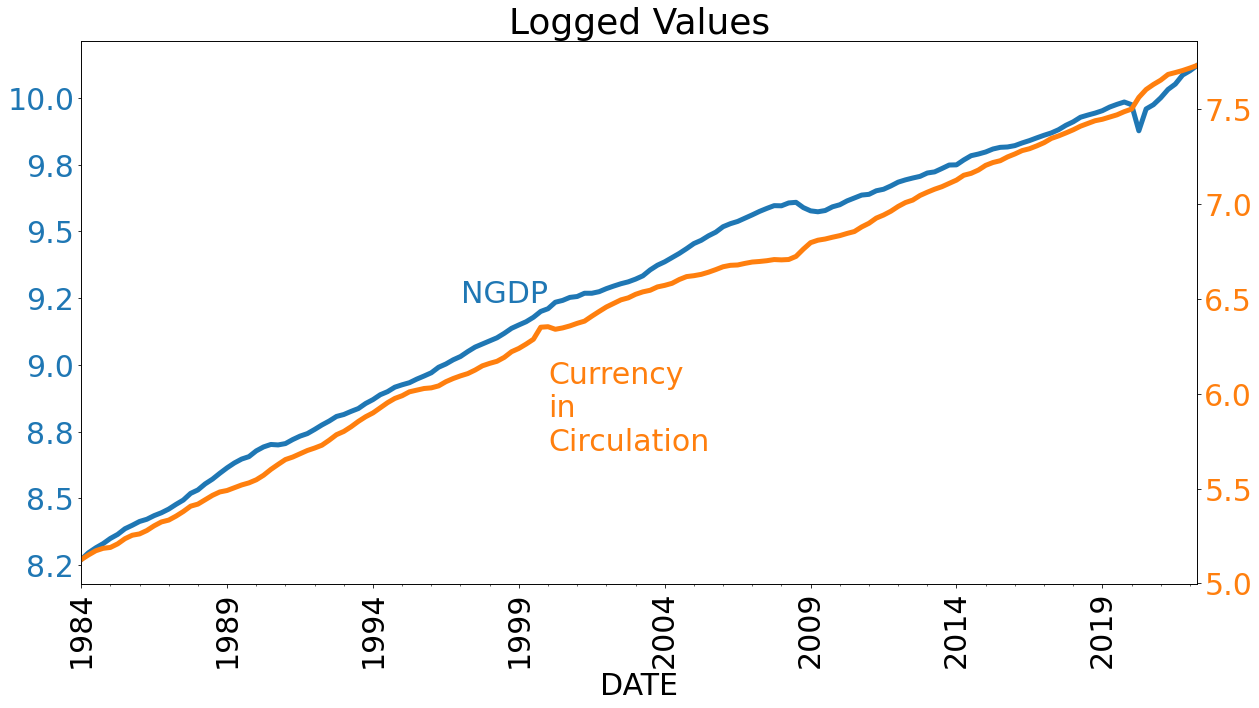

In [4]:
plt.rcParams.update({"font.size" : 30})
plot_vars = ["Nominal GDP",
            "Currency in Circulation"]
plot_df = np.log(data["Level"][plot_vars])
fig, ax = plt.subplots(figsize = (20,10))
var1, var2 = plot_vars[0], plot_vars[1]
plot_df[[var1]].plot.line(ax = ax,
                                    legend = False,
                                 linewidth = 5)
ax.set_xticklabels(ax.get_xticks(), rotation = 90)
ax.set_title("Logged Values")
ax2 = ax.twinx()
plot_df[[var2]].plot.line(ax = ax2,
                                  legend = False,
                                  color = "C1",
                                 linewidth = 5)
ax.set_yticklabels([round(y,1) for y in ax.get_yticks()], color = "C0")
ax2.set_yticklabels([round(y,1) for y in ax2.get_yticks()], color = "C1")
date = "2000-03-31"

ax.text(date, plot_df[var1].loc[date], "NGDP", color = "C0", va = "bottom", ha = "right")
ax2.text(date, plot_df[var2].loc[date],"\nCurrency\nin\nCirculation",ha = "left", va = "top", color = "C1")

It is especially important that we take care in delineating the relationship between $M$ and $P$ in a world where monetary policy is countercyclical. it will often be the case that as the rate of inflation is rising, the rate of expansion of currency is actually shrinking. So it looks like the quantity theory is dead, but, in fact, the central bank is 1) responding to velocity and 2) attempting to maintain stable inflation expectations. Unstable expectations will generate volatile changes in velocity.

Comparing logged values can be deceptive, especially when variables share the same trend. Consistent patterns in the vertical distance between two trended lines is meaningful, however we can develop a clearer picture of the relationship by comparing logged differences. At the end of this lecture, we will construct VARS with the same principle in mind.

Text(0.5, 1.0, '$\\rho_{C,V}:-0.19$\nMonthly $\\% \\Delta$')

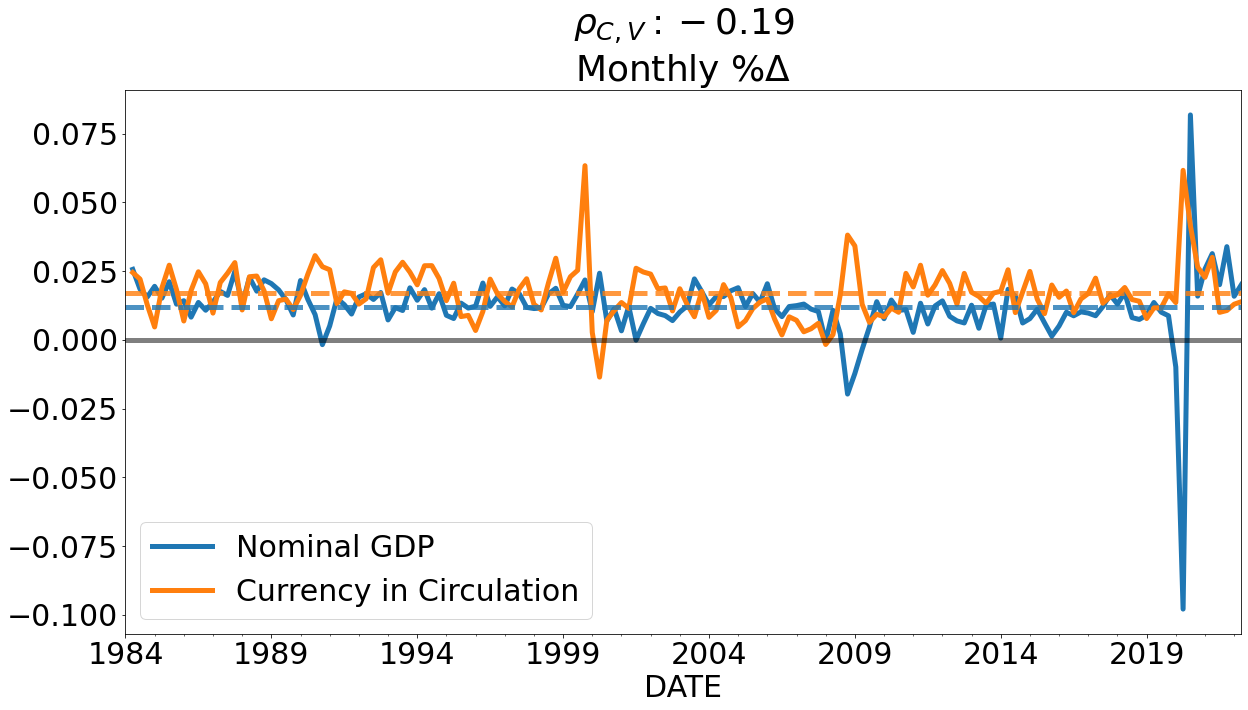

In [5]:
fig, ax = plt.subplots(figsize = (20,10))
plot_vars = ["Nominal GDP", "Currency in Circulation"]
plot_df = np.log(data["Level"][plot_vars]).diff()
# ax2 = ax.twinx()
plot_df.plot.line(linewidth = 5,
                  ax = ax)
ax.axhline(plot_df.mean()[plot_vars[0]], ls = "--", color = "C0", alpha = .8, linewidth = 5)
ax.axhline(plot_df.mean()[plot_vars[1]], ls = "--", color = "C1", alpha = .8,  linewidth = 5)
ax.axhline(0, ls = "-", color = "k", alpha = .5, linewidth = 5)
ax.set_title("$\\rho_{C,V}:" + str(plot_df.corr().round(2)[plot_vars[0]][plot_vars[1]])+ "$\nMonthly $\% \Delta$")

Text(0.5, 1.0, '$\\rho_{C,V}:-0.13$\n$\\% \\Delta$ Year-over-Year')

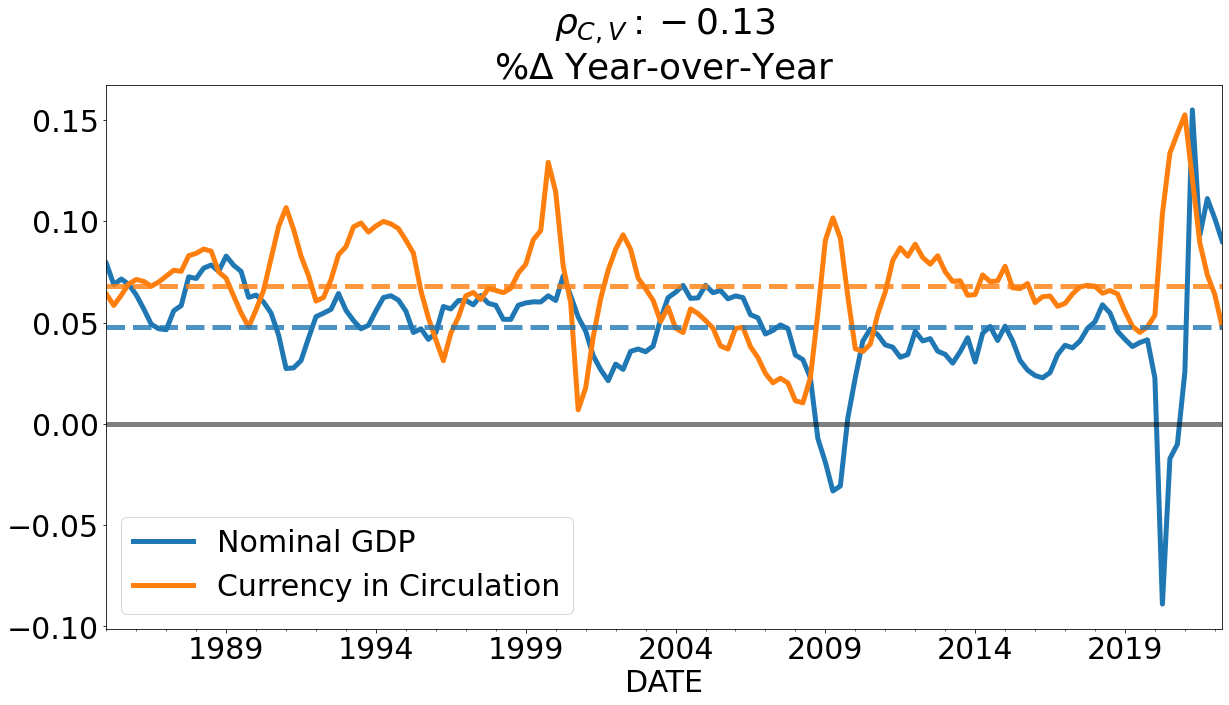

In [6]:
fig, ax = plt.subplots(figsize = (20,10))
plot_vars = ["Nominal GDP", "Currency in Circulation"]
plot_df = np.log(data["Level"][plot_vars]).diff(4).dropna()
# ax2 = ax.twinx()
plot_df.plot.line(linewidth = 5,
                  ax = ax)
ax.axhline(plot_df.mean()[plot_vars[0]], ls = "--", color = "C0", alpha = .8, linewidth = 5)
ax.axhline(plot_df.mean()[plot_vars[1]], ls = "--", color = "C1", alpha = .8, linewidth = 5)
ax.axhline(0, ls = "-", color = "k", alpha = .5, linewidth = 5)
ax.set_title("$\\rho_{C,V}:" + str(plot_df.corr().round(2)[plot_vars[0]][plot_vars[1]])+ "$\n$\% \Delta$ Year-over-Year")

C:\Users\JLCat\AppData\Local\Temp\ipykernel_30472\3727728305.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(i,3) for i in ax.get_yticks()], color = "C0")
C:\Users\JLCat\AppData\Local\Temp\ipykernel_30472\3727728305.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([round(i,3) for i in ax2.get_yticks()], color = "C1")


Text(0.5, 1.0, '$\\rho_{C,V}:-0.69$\nMonthly $\\% \\Delta$')

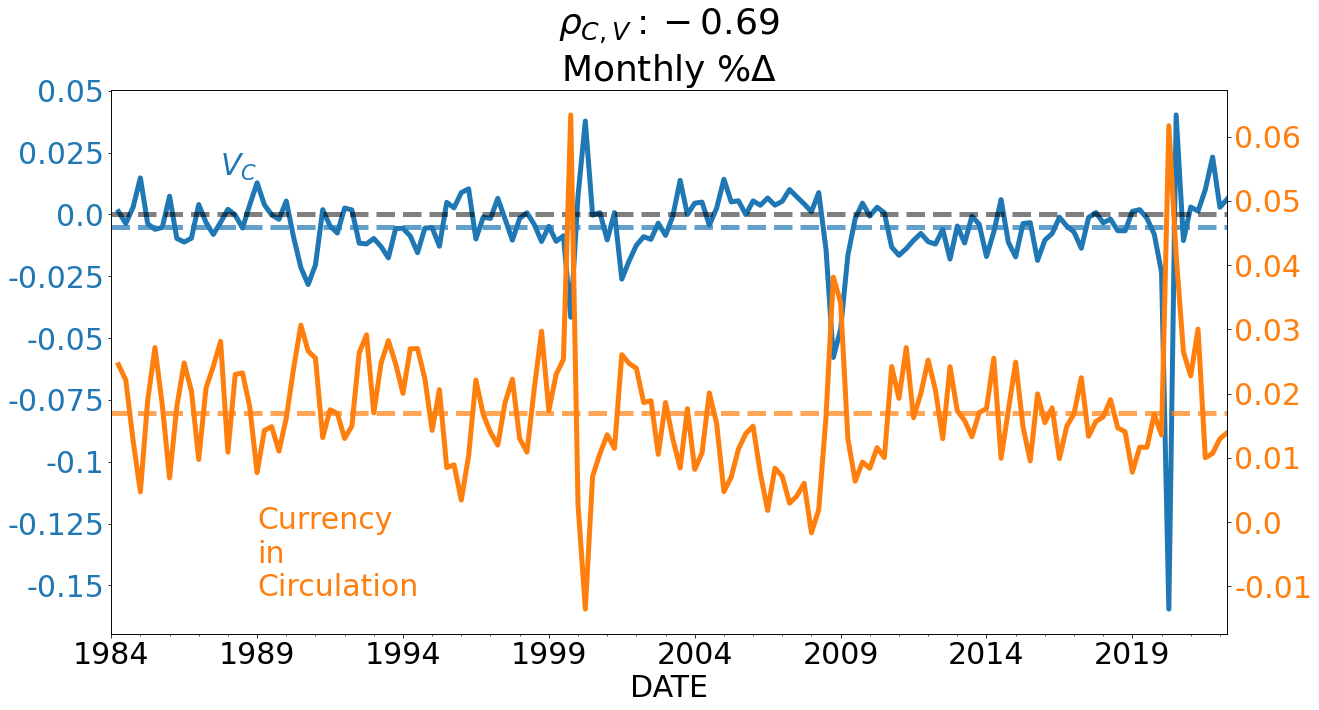

In [7]:
fig, ax = plt.subplots(figsize = (20,10))
plot_vars = ["$V_C$", "Currency in Circulation"]
plot_df = np.log(data["Level"][plot_vars]).diff()
ax2 = ax.twinx()
var1, var2 = plot_vars
plot_df[var1].plot.line(linewidth = 5,
                  ax = ax)
plot_df[var2].plot.line(linewidth = 5,
                                color = "C1",
                  ax = ax2)
date = "1989-03-31"
ax.text(date, plot_df[var1].loc[date], var1, color = "C0", va = "bottom", ha = "right")
ax2.text(date, plot_df[var2].loc[date],"\nCurrency\nin\nCirculation",ha = "left", va = "top", color = "C1")
ax.set_yticklabels([round(i,3) for i in ax.get_yticks()], color = "C0")
ax2.set_yticklabels([round(i,3) for i in ax2.get_yticks()], color = "C1")
ax.axhline(0, ls = "--", color = "k", alpha = .5, linewidth = 5)
ax.axhline(plot_df.mean()[plot_vars[0]], ls = "--", color = "C0", alpha = .7, linewidth = 5)
ax2.axhline(plot_df.mean()[plot_vars[1]], ls = "--", color = "C1", alpha = .7, linewidth = 5)
ax.set_title("$\\rho_{C,V}:" + str(plot_df.corr().round(2)[plot_vars[0]][plot_vars[1]])+ "$\nMonthly $\% \Delta$")

C:\Users\JLCat\AppData\Local\Temp\ipykernel_30472\74033709.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([round(i,3) for i in ax.get_yticks()], color = "C0")
C:\Users\JLCat\AppData\Local\Temp\ipykernel_30472\74033709.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels([round(i,3) for i in ax2.get_yticks()], color = "C1")


Text(0.5, 1.0, '$\\rho_{C,V}:-0.73$\n$\\% \\Delta$ Year-over-Year')

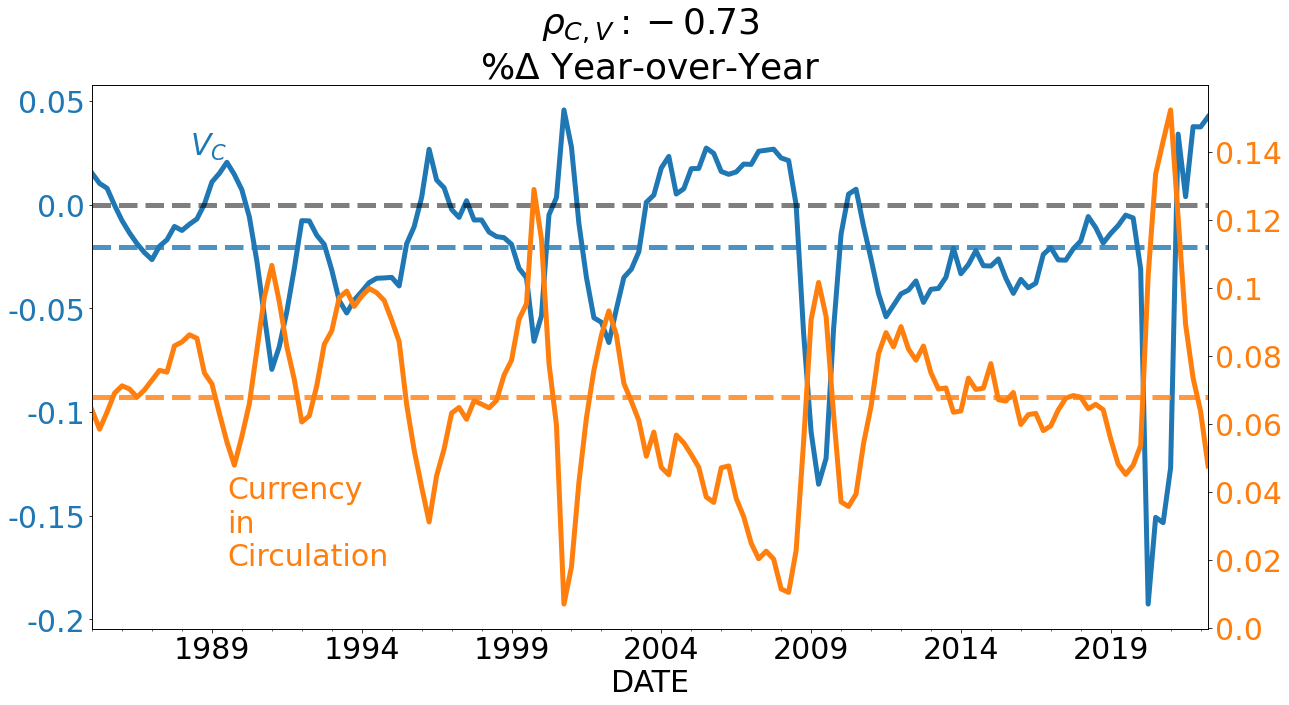

In [8]:
fig, ax = plt.subplots(figsize = (20,10))
plot_vars = ["$V_C$", "Currency in Circulation"]
plot_df = np.log(data["Level"][plot_vars]).diff(4).dropna()
ax2 = ax.twinx()
plot_df[plot_vars[0]].plot.line(linewidth = 5,
                  ax = ax)
plot_df[plot_vars[1]].plot.line(linewidth = 5,
                                color = "C1",
                  ax = ax2)
date = "1989-09-30"
ax.text(date, plot_df[var1].loc[date], var1, color = "C0", va = "bottom", ha = "right")
ax2.text(date, plot_df[var2].loc[date],"\nCurrency\nin\nCirculation",ha = "left", va = "top", color = "C1")
ax.set_yticklabels([round(i,3) for i in ax.get_yticks()], color = "C0")
ax2.set_yticklabels([round(i,3) for i in ax2.get_yticks()], color = "C1")
ax.axhline(plot_df.mean()[plot_vars[0]], ls = "--", color = "C0", alpha = .8, linewidth = 5)
ax2.axhline(plot_df.mean()[plot_vars[1]], ls = "--", color = "C1", alpha = .8, linewidth = 5)
ax.axhline(0, ls = "--", color = "k", alpha = .5, linewidth = 5)
ax.set_title("$\\rho_{C,V}:" + str(plot_df.corr().round(2)[plot_vars[0]][plot_vars[1]])+ "$\n$\% \Delta$ Year-over-Year")

<AxesSubplot:xlabel='$V_C$', ylabel='Currency in Circulation'>

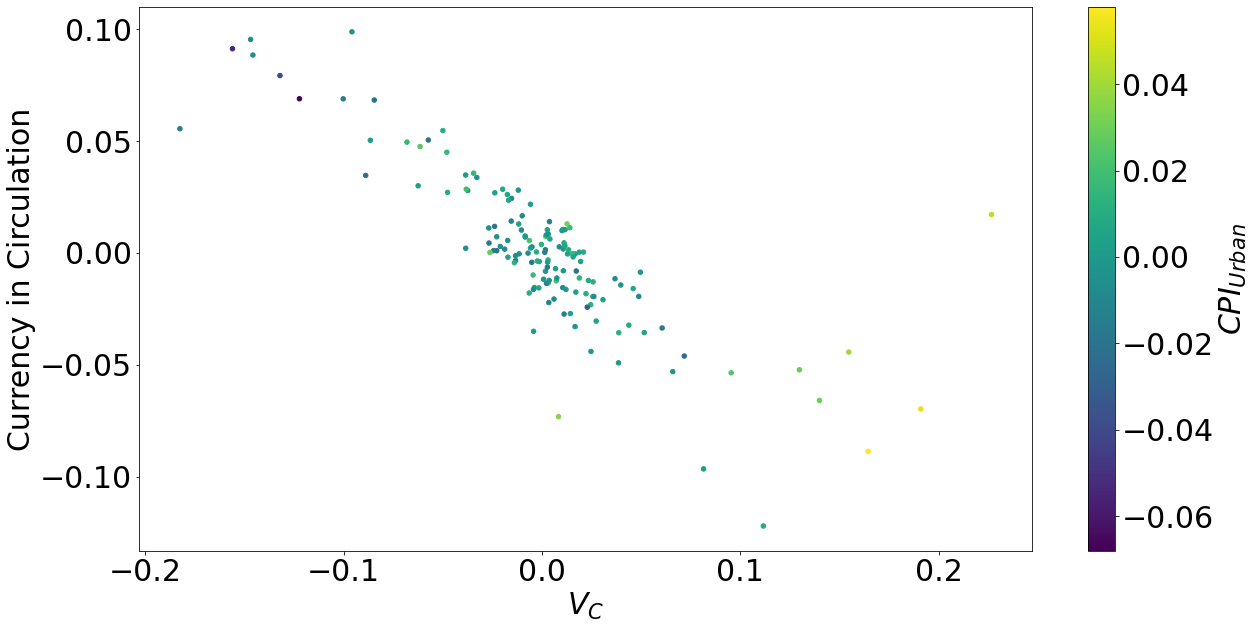

In [9]:
fig, ax = plt.subplots(figsize = (20,10))
plot_vars = ["$V_C$", "Currency in Circulation","$CPI_{Urban}$"]
plot_df = np.log(data["Level"][plot_vars]).diff(4).diff(4)

plot_df.plot.scatter(x = plot_vars[0], y = plot_vars[1], c = plot_vars[2],  
                     cmap = "viridis", ax = ax)


### Naive Quantity Theory of Long Periods of Time

While a look at quarterly or even annual data may seem to *disprove* the quantity theory, at least in its formulation that changes in $M$ directly correspond to changes in $P$, if we define the long-run over decades, we see that, in fact, the relationship is true. Using the data presented by Scott Sumner in chapter 4, we can see that, in fact, the quantity theory holds up, especially when rates of expansion of the quantity of money significantly exceed the rate of growth of the quantity of money. We will run both the naive regression and also control for real income growth. We find that over long periods of time, the quantity theory holds up in both it naive form and as a statement of the relationship between the quantity of money and nominal income.

In [10]:
inflation_data = pd.read_excel("SumnerInflationData.xlsx")
inflation_data.set_index("Country", inplace = True)
inflation_data["$\\frac{M}{P}$"] = inflation_data["M"].sub(inflation_data["P"])
inflation_data["Py"] = inflation_data["P"].add(inflation_data["y"])
inflation_data

,P,M,y,$\frac{M}{P}$,Py
Country,,,,,
Brazil,77.8,77.4,5.6,-0.4,83.4
Argentina,76.0,72.8,2.1,-3.2,78.1
Bolivia,48.0,49.0,3.3,1.0,51.3
Peru,47.6,49.7,3.0,2.1,50.6
Uruguay,43.1,42.4,1.5,-0.7,44.6
...,...,...,...,...,...
Belgium,4.1,4.0,3.3,-0.1,7.4
Malta,3.6,9.6,6.2,6.0,9.8
Singapore,3.6,10.8,8.1,7.2,11.7


C:\Users\JLCat\AppData\Local\Temp\ipykernel_30472\60500831.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(i)) + "%" for i in ax.get_xticks()])
C:\Users\JLCat\AppData\Local\Temp\ipykernel_30472\60500831.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(i)) + "%" for i in ax.get_yticks()])


[Text(0, -20.0, '-20%'),
 Text(0, 0.0, '0%'),
 Text(0, 20.0, '20%'),
 Text(0, 40.0, '40%'),
 Text(0, 60.0, '60%'),
 Text(0, 80.0, '80%'),
 Text(0, 100.0, '100%')]

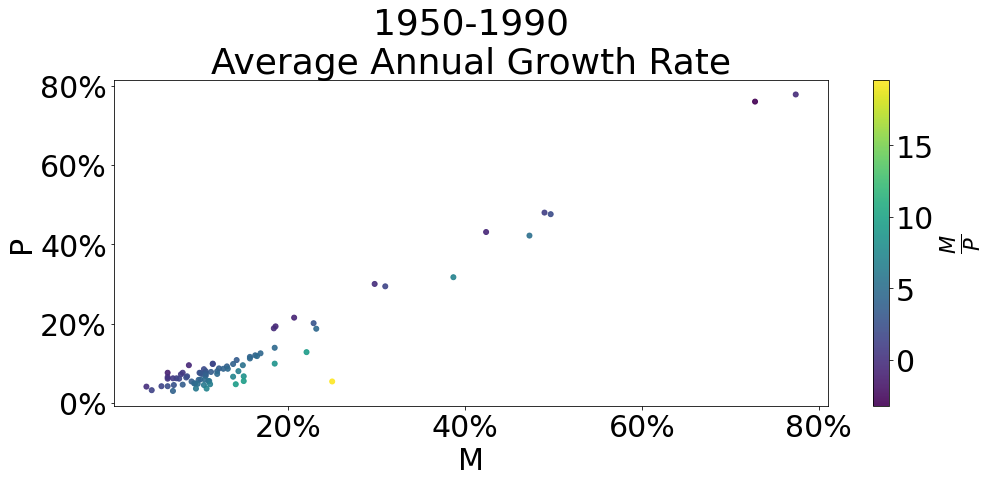

In [11]:
import statsmodels.api as sm
plt.rcParams.update({"font.size" : 30})
fig, ax = plt.subplots(figsize = (16, 6))  
inflation_data.plot.scatter(x = "M", y = "P", c = "$\\frac{M}{P}$", cmap = "viridis", s = 25, alpha =.9, ax = ax)
ax.set_title("1950-1990\nAverage Annual Growth Rate")
ax.set_xticklabels([str(int(i)) + "%" for i in ax.get_xticks()])
ax.set_yticklabels([str(int(i)) + "%" for i in ax.get_yticks()])


In [12]:
reg_vars = ["P", "M", "y", "$\\frac{M}{P}$"]
reg_data = inflation_data[reg_vars]
y = reg_data[["P"]]
X = reg_data[["M"]]
X["Constant"] = 1 #, "constant"]]
reg = sm.OLS(y,X)
# robust errors, use HC3
results = reg.fit(cov_type = "HC3")
results.summary()

C:\Users\JLCat\AppData\Local\Temp\ipykernel_30472\1510010201.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1 #, "constant"]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      P   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     873.9
Date:                Thu, 22 Sep 2022   Prob (F-statistic):           8.86e-44
Time:                        17:48:00   Log-Likelihood:                -203.24
No. Observations:                  79   AIC:                             410.5
Df Residuals:                      77   BIC:                             415.2
Df Model:                           1                                         
Covariance Type:                  HC3                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
M              1.0284      0.035     29.561      0.000       0.960       1.097
Constant      -4.0030      0.547     -7.321      0.000      -5.075      -2.931
==============================================================================
Omnibus:                       47.071   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.649
Skew:                          -1.765   Prob(JB):                     2.21e-45
Kurtosis:                      10.072   Cond. No.                         32.8
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC3)
"""

C:\Users\JLCat\AppData\Local\Temp\ipykernel_30472\4217252404.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(i)) + "%" for i in ax.get_xticks()])
C:\Users\JLCat\AppData\Local\Temp\ipykernel_30472\4217252404.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(i)) + "%" for i in ax.get_yticks()])


[Text(0, -20.0, '-20%'),
 Text(0, 0.0, '0%'),
 Text(0, 20.0, '20%'),
 Text(0, 40.0, '40%'),
 Text(0, 60.0, '60%'),
 Text(0, 80.0, '80%'),
 Text(0, 100.0, '100%')]

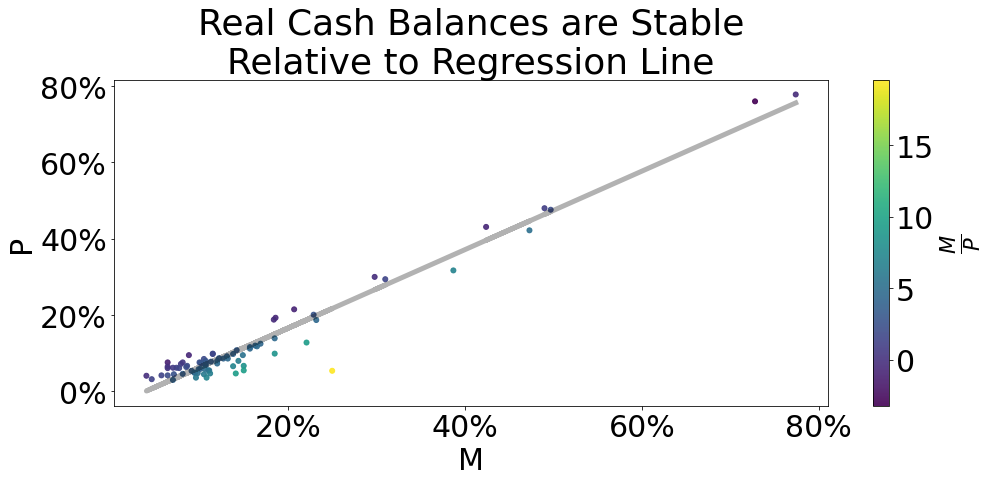

In [13]:
reg_data["$\\hat{P}$"] = results.predict()
fig, ax = plt.subplots(figsize = (16, 6))  
reg_data.plot.scatter(x = "M", y = "P", c = "$\\frac{M}{P}$", cmap = "viridis", s = 25, alpha =.9, ax = ax)
ax.plot(reg_data["M"], reg_data["$\\hat{P}$"], linewidth = 5, color = "k", alpha = .3)
ax.set_title("Real Cash Balances are Stable\nRelative to Regression Line")
ax.set_xticklabels([str(int(i)) + "%" for i in ax.get_xticks()])
ax.set_yticklabels([str(int(i)) + "%" for i in ax.get_yticks()])


<AxesSubplot:ylabel='Frequency'>

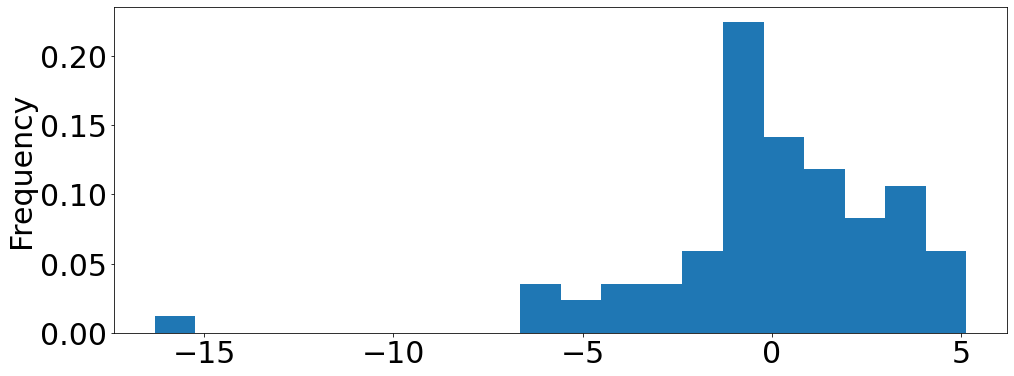

In [14]:
fig, ax = plt.subplots(figsize = (16, 6))  
reg_data["$\hat{e}$"] = results.resid
reg_data["$\hat{e}$"].plot.hist(bins = 20, density = True)


C:\Users\JLCat\AppData\Local\Temp\ipykernel_30472\961141270.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["$\\hat{P}$"] = results.predict()
C:\Users\JLCat\AppData\Local\Temp\ipykernel_30472\961141270.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([str(int(i)) + "%" for i in ax.get_xticks()])
C:\Users\JLCat\AppData\Local\Temp\ipykernel_30472\961141270.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(i)) + "%" for i in ax.get_yticks()])


[Text(0, -20.0, '-20%'),
 Text(0, 0.0, '0%'),
 Text(0, 20.0, '20%'),
 Text(0, 40.0, '40%'),
 Text(0, 60.0, '60%'),
 Text(0, 80.0, '80%'),
 Text(0, 100.0, '100%')]

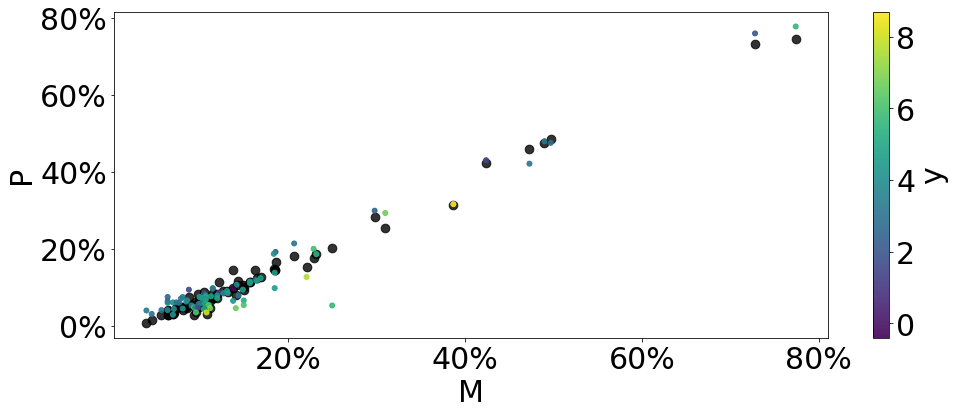

In [15]:
reg_vars = ["P", "M", "y"]
y_name, x_name = reg_vars[0], reg_vars[1:]
reg_data = inflation_data[reg_vars]
y = reg_data[["P"]]
X = reg_data[["M", "y"]]
# X["Constant"] = 1 #, "constant"]]
reg = sm.OLS(y,X)
results = reg.fit(cov_type = "HC3")
reg_data["$\\hat{P}$"] = results.predict()
fig, ax = plt.subplots(figsize = (16, 6))  
reg_data.plot.scatter(x = "M", y = "$\\hat{P}$", color = "k", s = 75, alpha = .8, ax = ax)
reg_data.plot.scatter(x = "M", y = "P", c = "y", cmap = "viridis", s = 25, alpha =.9, ax = ax)
ax.set_xticklabels([str(int(i)) + "%" for i in ax.get_xticks()])
ax.set_yticklabels([str(int(i)) + "%" for i in ax.get_yticks()])


In [16]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      P   R-squared (uncentered):                   0.980
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              1122.
Date:                Thu, 22 Sep 2022   Prob (F-statistic):                    1.12e-57
Time:                        17:48:00   Log-Likelihood:                         -190.32
No. Observations:                  79   AIC:                                      384.6
Df Residuals:                      77   BIC:                                      389.4
Df Model:                           2                                                  
Covariance Type:                  HC3                                                  
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
M              1.0354      0.024     42.311      0.000       0.987       1.083
y             -0.9947      0.094    -10.590      0.000      -1.179      -0.811
==============================================================================
Omnibus:                       60.249   Durbin-Watson:                   1.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              376.827
Skew:                          -2.230   Prob(JB):                     1.49e-82
Kurtosis:                      12.725   Cond. No.                         6.99
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC3)
"""

<AxesSubplot:ylabel='Frequency'>

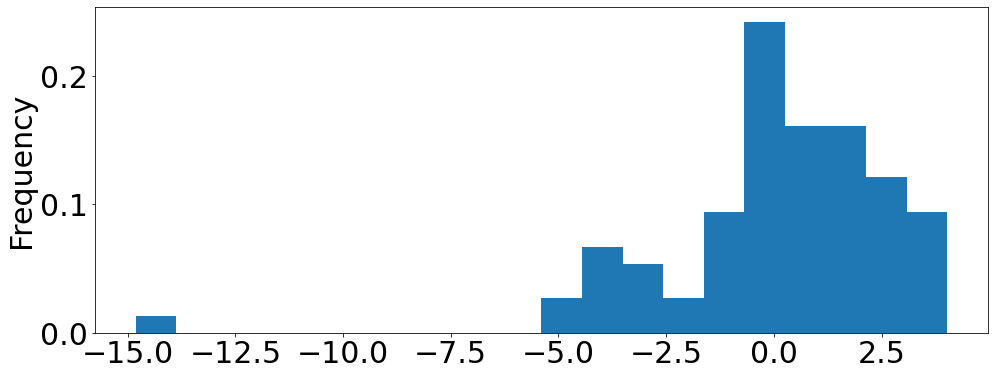

In [17]:
fig, ax = plt.subplots(figsize = (16, 6))  
reg_data["$\hat{e}$"] = results.resid
reg_data["$\hat{e}$"].plot.hist(density = True, bins = 20)

### Real Cash Balances: Demand for Money and the Quantity Theory

In "The Quantity Theory of Money - A Restatement", Milton Friedman identifies that demand for money is a function of the implicit return on holding currency and expected returns on investments in bonds, equities, physical capital, and human-capital. He begins his analysis by identifying that there is an average return to wealth, W, indicated by $r$, the rate of return on wealth, and $y$, income flows generated by wealth.

$$W = \frac{y}{r}$$
Implies $rW = Y$

Using this first equation as an interpreted anchor, Friedman simply replace $W$ with the price of a bond, $p_b$. Similar to the example of the stock of wealth, the flow divide by the rate of return indicates the price of a bond. Friedman asserts an annual flow of \\$1 to be earned by the bondholder.

$$p_b = \frac{1}{r_b}$$

$$p_b = \frac{flow}{rate}$$

The expected net change of income is equal to the product of the bond price and the interest rate.

$$flow = (r_b)p_b$$

Since the bond provide a perpetual income stream, Friedman's presentation is really of an alienable annuity with time measured in years. He accounts for potential changes in the value of income that would be derived if the rate of the bond changes. Future income must be defined by the future coupon payment plus the rate of change in the bond price. **By making the flow of the bond \$1, Friedman makes the price of the bond equal to the inverse of the rate.**  

$$r_{b_{t=0}} +r_{b_{t=0}}\frac{d\frac{1}{r_{b_t}}}{dt}$$

Friedman derives his result using the quotient rule:

$$\frac{d\frac{1}{r_{b_t}}}{dt} = \frac{r_{b_t}(0) - 1(\frac{dr_{b_t}}{dt})}{r_{b_t}^2}$$
$$\frac{d\frac{1}{r_{b_t}}}{dt} = -\frac{dr_{b_t}}{r_{b_t}^2dt}$$

Replace $\frac{d\frac{1}{r_{b_t}}}{dt}$ with $ -\frac{dr_{b_t}}{r_{b_t}^2dt}$:

$$r_{b_{t=0}}-\frac{r_{b_{t=0}}}{r_{b_t}^2}\frac{dr_{b_t}}{dt}$$

If $r_b = r_{b_{t=0}} = r_{b_t}$

$$r_b-\frac{1}{r_b}\frac{dr_b}{dt}$$

A rise in the future rate of bonds, $r_{b}$, indicated by $r_b + \frac{dr_b}{dt}$ relative to the present rate indicates a devaluation of the bond purchased at time $t=0$. Friedman indicates that this bond is purchased for \$1, therefore the interest rate is the same as the interest payment (flow). 


Suppose that inflation is calculated into equities where a regular dividend of \\$1 is paid at time $t$:

$$\ = $1\frac{P_t}{P_0}\$$

Note that $P_t$ is the expected price level. If the price level is reflected in $P_t$ and the risk adjusted return of bonds matches that of equities in equilibrium, $r_{e_{t}}$:

$$\frac{1}{r_{e_t}} \frac{P_t}{P_0}$$

### The nominal stream purchased for \\$1 at time $t=0$:

$$r_{e_{t=0}} \frac{P_t}{P_{t=0}} +  \frac{r_{e_{t=0}}}{r_{e_{t}}} \frac{1}{P_{t=0}} \frac{dP_t}{dt} - \frac{P_t}{P_{t=0}} \frac{r_{e_{t=0}}}{r_{e_t}^2} \frac{dr_{e_t}}{dt} $$

### If $r_e = r_{e_{t=0}} = r_{e_t}$:

$$r_e + \frac{1}{P} \frac{dP_t}{dt} - \frac{1}{r_e}\frac{dr_e}{dt}$$




Demand for money, M, is a function of the price level, expected revenues from bond holdings, expected revenues from equity holdings, expected returns to the price of physical capital, returns to human capital, returns to wealth holding, and individual preferences and tastes $u$. $u$ includes perceptions concernign uncertainty. 

$$M=f(P, r_b - \frac{1}{r_b}\frac{dr_b}{dt}, r_e + \frac{1}{P}\frac{dP}{dt} - \frac{1}{r_e}\frac{dr_e}{dt}, \frac{1}{P} \frac{dP}{dt}; w; \frac{y}{r}; u)$$

### In equilibrium, return on investment in bonds is equal to return on investment in equities

$$r_b - \frac{1}{r_b} \frac{dr_b}{dt} = r_e + \frac{1}{P} \frac{dP}{dt} - \frac{1}{r_e} \frac{dr_e}{dt}$$

We can add the assumption that changes in the average price of bonds and of equities are proportional. Notice that the return on bonds is stated in purely nominal terms whereas the return on equities is stated in real terms with the value of (expected) inflation added to the return. In equilibrium, observed and expected values are the same. Simply put, this is the Fisher equation.

$$r_b = r_e + \frac{1}{P} \frac{dP}{dt}$$


### Real Cash Balances Approach:

$$\frac{M}{P} = f(r_b, r_e, \frac{1}{P} \frac{dP}{dt}, w, \frac{y}{P}, u)$$

In Snowden and Vane, this is simplified, as is often the case, to:

$$\frac{M}{P} = f(r_b, r_e, \frac{1}{P}\frac{dP}{dt},\frac{y}{P}, u)$$

The key point is that real cash balances automatically adjust to account for inflation and inflation is a function of the quantity of money. It is common to simplify this result so that:

% $$\frac{M_d}{P} = f(\textbf{y},r)$$

This is the approach taken by McCallum. The quantity of real cash balances held are a function of real income and returns on bonds. Of course, real income indicates transaction demand for money where as the rate paid on bonds anchors the velocity of money. Higher interest rates are associated with higher velocity and, therefore, a fall in demand for money. If real cash balances reflect demand for money, then real cash balances will fall with an increase in interest rates as this implies a fall in portfolio demand for money. Higher rates on bonds indicate an increased opportunty cost of holding money. An increase in income, on the other hand, represents an increase in transactions demand.

If the price level instantly responded to changes in the quantity of currency and changes in demand for money, then this relationship would hold for currency in circulation. There are measures, [Divisia $M_4$](https://centerforfinancialstability.org/amfm_data.php), that do account for changing quantity of monetary services from financial instruments. We will use $M_4$ to calculate the level of real cash balances. Then we will test the demand variables, $y$ and $r$ to compare observed responses of $\frac{M}{P}$ to these variables.

In [18]:
divisia = pd.read_excel("https://centerforfinancialstability.org/amfm/Divisia.xlsx", 
                        sheet_name = "Broad", header  =1, index_col = "Date")
divisia

,"Divisia M4 level, normalized to equal 100 in Jan. 1967",Divisia M4 year-over-year percentage growth rate,"M4 interest-rate aggregate, percent per year",Unnamed: 4,"Divisia M4- level, normalized to equal 100 in Jan. 1967",Divisia M4- year-over-year percentage growth rate,"M4- interest-rate aggregate, percent per year",Unnamed: 8,"Divisia M3 level, normalized to equal 100 in Jan. 1967",Divisia M3 year-over-year percentage growth rate,"M3 interest-rate aggregate, percent per year",Unnamed: 12,Note: DM4- is DM4 minus Treasury bills; DM3 is DM4- minus commercial papers.
Date,,,,,,,,,,,,,
1967-01-01,100.000000,NaN,0.033670,NaN,100.000000,NaN,0.032064,NaN,100.000000,NaN,0.031320,NaN,NaN
1967-02-01,100.688687,NaN,0.033172,NaN,100.691848,NaN,0.031703,NaN,100.699838,NaN,0.031057,NaN,NaN
1967-03-01,101.865015,NaN,0.032607,NaN,101.675160,NaN,0.031392,NaN,101.695482,NaN,0.030798,NaN,NaN
1967-04-01,101.797048,NaN,0.031250,NaN,101.729316,NaN,0.030399,NaN,101.741173,NaN,0.029912,NaN,NaN
1967-05-01,102.655693,NaN,0.031192,NaN,102.635977,NaN,0.030623,NaN,102.661436,NaN,0.030199,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-01,2256.792578,0.044207,0.001571,NaN,2077.651488,0.076181,0.001207,NaN,2096.012235,0.081320,0.000983,NaN,NaN
2022-04-01,2251.122947,0.031591,0.002217,NaN,2072.015965,0.061530,0.001524,NaN,2089.389637,0.067542,0.001237,NaN,NaN
2022-05-01,2252.961329,0.020607,0.003431,NaN,2076.581454,0.046948,0.002628,NaN,2093.343275,0.053321,0.002215,NaN,NaN


In [19]:
index = data["Level"].index
keys = divisia.keys()
divisia = divisia.resample("Q").mean().loc[index].rename(columns={keys[0]: "M4",
                                                                keys[2]:"M4 Interest Rate"})
data["Level"]["M4"] = divisia["M4"]
data["Level"]["$r_{M4}$"] = divisia["M4 Interest Rate"]
data["Level"]["$\\frac{C}{P}$"] = data["Level"]["Currency in Circulation"].div(data["Level"]["$CPI_{Urban}$"].div(100))
data["Level"]["$\\frac{M_4}{P}$"] = data["Level"]["M4"].div(data["Level"]["$CPI_{Urban}$"].div(100))
rates = [key for key in data["Level"].keys() if "Rate" in key]
for rate in rates:
    data["Level"]["Real " + rate] = data["Level"][rate].sub(data["Level"]["$CPI_{Urban}$"].pct_change(4))
    
data["Log"] = np.log(data["Level"])
rates = [key for key in data["Level"].keys() if "Rate" in key or "$r_" in key]
for rate in rates:
    data["Log"][rate] = data["Level"][rate]
data["Log Diff"] = data["Log"].diff(diff)
  

In [20]:
data["Level"]

,Nominal GDP,Real GDP,$CPI_{Urban}$,10 Year UST Rate,Currency in Circulation,$V_C$,M4,$r_{M4}$,$\frac{C}{P}$,$\frac{M_4}{P}$,Real 10 Year UST Rate
DATE,,,,,,,,,,,
1984-03-31,3908.054,7488.167,102.300000,11.954516,168.290462,23.222077,293.795792,0.079335,164.506805,287.190412,NaN
1984-06-30,4009.601,7617.547,103.400000,13.213968,172.464308,23.248874,299.551186,0.086671,166.793334,289.701340,NaN
1984-09-30,4084.250,7690.985,104.533333,12.873175,176.321385,23.163668,301.968308,0.091446,168.674794,288.872743,NaN
1984-12-31,4148.551,7754.117,105.300000,11.760656,178.572923,23.231691,305.324397,0.079888,169.584922,289.956693,NaN
1985-03-31,4230.168,7829.260,105.966667,11.586500,179.415308,23.577520,312.806941,0.073096,169.312967,295.193716,11.550658
...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30,22740.959,19368.310,269.315000,1.590781,2168.094538,10.488915,2201.037788,0.000477,805.040395,817.272632,1.542292
2021-09-30,23202.344,19478.893,273.626667,1.324844,2189.920154,10.595064,2207.715815,0.000517,800.331408,806.835036,1.271487
2021-12-31,24002.815,19806.290,277.779667,1.533387,2213.453769,10.844055,2237.854013,0.000545,796.837938,805.621966,1.466496


In [21]:
# plot_vars = ["$\\frac{C}{P}$", "Real GDP", "Real 10 Year UST Rate"]#, "$\\frac{M4}{C}$"]
plot_vars = ["$\\frac{M_4}{P}$", "Real GDP", "$r_{M4}$"]
plot_data = data["Log Diff"][plot_vars].dropna()
plot_data

,$\frac{M_4}{P}$,Real GDP,$r_{M4}$
DATE,,,
1984-06-30,0.008705,0.017130,0.007336
1984-09-30,-0.002864,0.009594,0.004775
1984-12-31,0.003745,0.008175,-0.011558
1985-03-31,0.017900,0.009644,-0.006792
1985-06-30,0.005044,0.008766,-0.005152
...,...,...,...
2021-06-30,-0.002170,0.016274,-0.000048
2021-09-30,-0.012854,0.005693,0.000040
2021-12-31,-0.001505,0.016668,0.000028


In [22]:
from statsmodels.tsa.stattools import adfuller
from arch.unitroot import KPSS

def adfuller_table(df):
    df_results = {}
    for key, vector in df.items():
        dftest = adfuller(vector, maxlag = 4, regression = "c")# autolag = "AIC")
        df_results[key] = pd.Series(
            dftest[0:4],
            index=[
                "t-stat",
                "p-value",
                "#Lags Used",
                "Number of Observations Used",
            ]) 
    return pd.DataFrame(df_results).round(2)


def kpss_table(df):
    df_results = {}
    for key, vector in df.items():
        df_results[key] = {}
        kpss_test = KPSS(vector, trend = "c", lags = 4)
        df_results[key]["t-stat"] =  kpss_test.stat#, regression="c", nlags = 4)# nlags="auto")
        df_results[key]["p-value"] = kpss_test.pvalue
        df_results[key]["Result"] = kpss_test.null_hypothesis if kpss_test.pvalue > .05 else "Reject: " + kpss_test.alternative_hypothesis 

    return pd.DataFrame(df_results).round(2)


In [23]:
adfuller_table(plot_data)

,$\frac{M_4}{P}$,Real GDP,$r_{M4}$
t-stat,-8.94,-13.98,-3.95
p-value,0.00,0.00,0.00
#Lags Used,0.00,0.00,4.00
Number of Observations Used,152.00,152.00,148.00


In [24]:
kpss_table(plot_data.dropna())

,$\frac{M_4}{P}$,Real GDP,$r_{M4}$
t-stat,0.077978,0.447359,0.096836
p-value,0.703976,0.054388,0.60132
Result,The process is weakly stationary.,The process is weakly stationary.,The process is weakly stationary.


C:\Users\JLCat\AppData\Local\Temp\ipykernel_30472\1881778490.py:10: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  a = pd.plotting.scatter_matrix(plot_data,c = plot_data[keys[0]],s = 1000, alpha = .3, ax=ax)


Text(0.5, 0.915, 'Correlation')

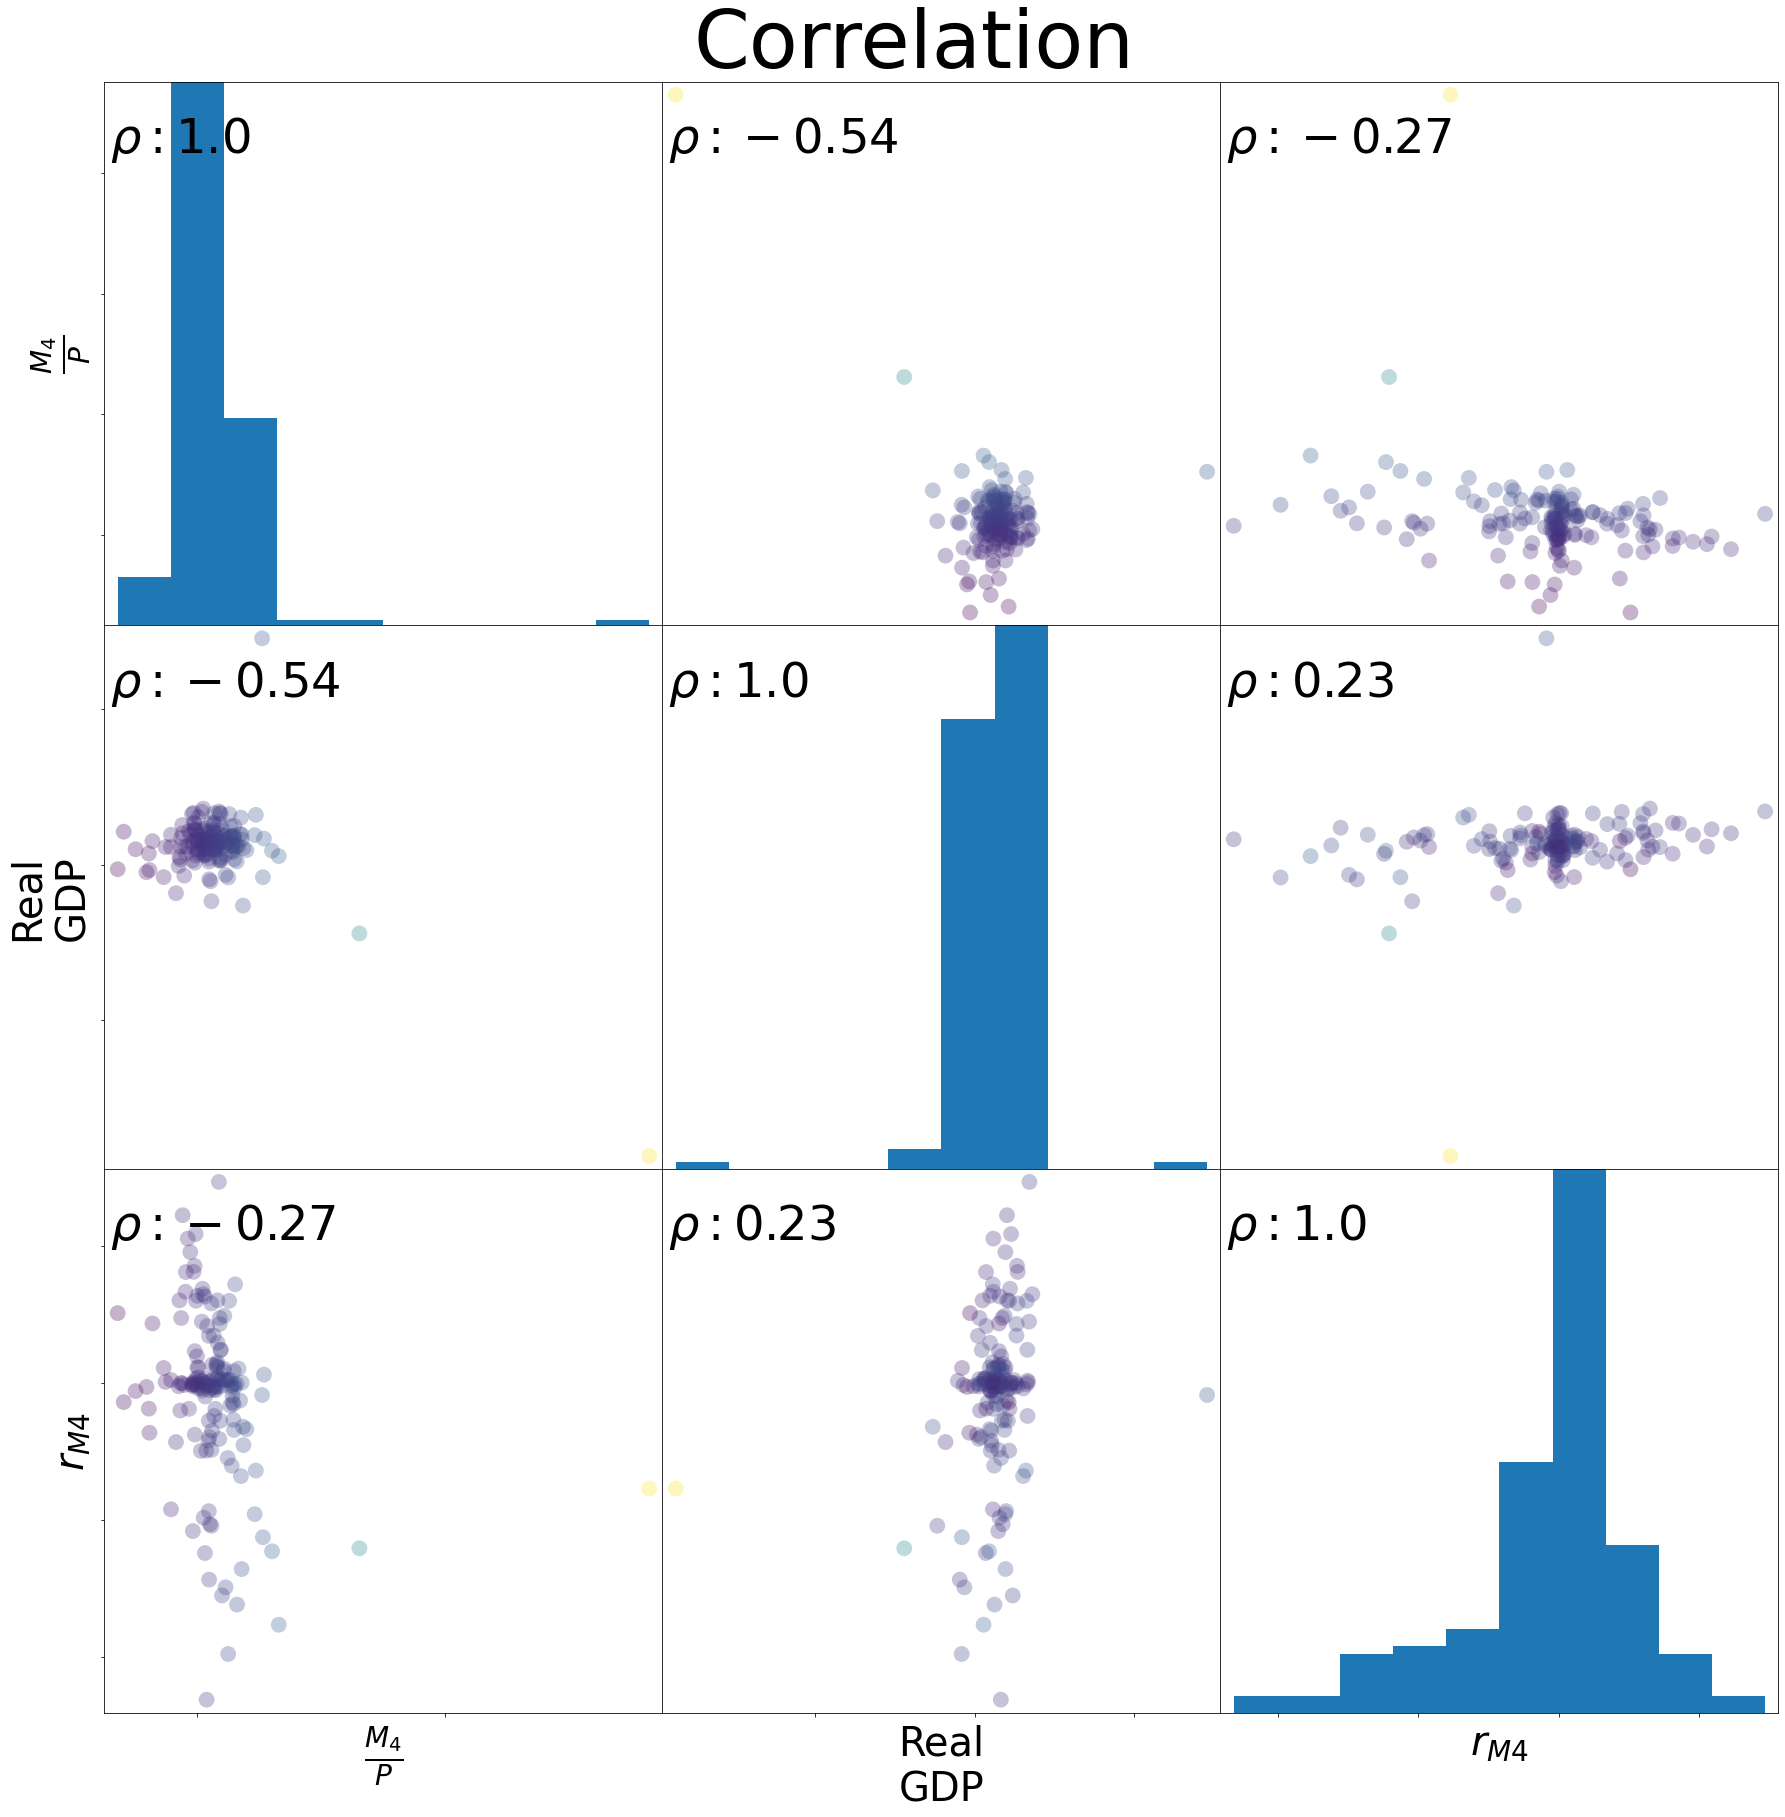

In [25]:
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] =0
plt.rcParams.update({"font.size" : 40})
plot_data.rename(columns = {key:key.replace(" ","\n") for key in plot_data.keys()}, inplace = True)
corr_df = plot_data.corr()
keys = list(corr_df.keys())
dim = len(keys)

fig, ax = plt.subplots(figsize = (30, 30))
a = pd.plotting.scatter_matrix(plot_data,c = plot_data[keys[0]],s = 1000, alpha = .3, ax=ax)  


for i in range(len(keys)):
    x = keys[i]
    for j in range(len(keys)):
        y = keys[j]
        a[i][j].set_xticklabels([])
        a[i][j].set_yticklabels([])
        a[i][j].set_title("$\\rho :" + str(corr_df.round(2)[x][y])+ "$", y = .86, x = 0.01, ha = "left")        
plt.suptitle("Correlation",y = .915, fontsize = 80)

In [26]:
from statsmodels.tsa.api import VAR
# reg_vars = ["$\\frac{M_4}{P}$", "Real GDP", "Real 10 Year UST Rate"]
reg_vars = plot_vars
reg_data = data["Log Diff"][reg_vars].dropna().loc[:"2019"]

model = VAR(reg_data)
model.select_order(8).summary()

,AIC,BIC,FPE,HQIC
0,-31.32,-31.25,2.501e-14,-31.29
1,-32.25,-31.99*,9.909e-15,-32.14
2,-32.35,-31.90,8.930e-15,-32.17*
3,-32.35,-31.70,8.942e-15,-32.09
4,-32.42*,-31.58,8.317e-15*,-32.08
5,-32.36,-31.32,8.902e-15,-31.94
6,-32.34,-31.12,9.023e-15,-31.85
7,-32.39,-30.96,8.691e-15,-31.81
8,-32.37,-30.76,8.831e-15,-31.72


In [27]:
print(model.select_order(8))

<statsmodels.tsa.vector_ar.var_model.LagOrderResults object. Selected orders are: AIC -> 4, BIC -> 1, FPE -> 4, HQIC ->  2>


In [28]:
lag_order = 4
results = model.fit(lag_order)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 22, Sep, 2022
Time:                     17:48:06
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                   -31.6160
Nobs:                     139.000    HQIC:                  -32.1048
Log likelihood:           1701.84    FPE:                8.17496e-15
AIC:                     -32.4393    Det(Omega_mle):     6.25171e-15
--------------------------------------------------------------------
Results for equation $\frac{M_4}{P}$
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                     -0.001461         0.001760           -0.830           0.406
L1.$\frac{M_4}{P}$         0.421161         0.089264            4.718           0.000
L1.Real GDP               -0.2

### Constructing VAR as Multivariate

Process generates same paramter estimates. Standard errors are different, likely due to selection of process used to construct standard errors.

In [29]:
def avg_lag_params(results, reg_vars):
    params = results.params
    avg_params = {}
    for key in plot_vars:
        avg_params[key] = params.loc[[(key in ix) for ix in params.index]].mean()

    avg_params = pd.DataFrame(avg_params).T
    avg_params.index.name = "$\\bar{\\beta}$"
    return avg_params
avg_lag_params(results, plot_vars)    
#     print(key)
#     print(params.loc[[(key in ix) for ix in params.index]])

,$\frac{M_4}{P}$,Real GDP,$r_{M4}$
$\bar{\beta}$,,,
$\frac{M_4}{P}$,0.107337,0.012621,0.002956
Real GDP,0.166111,0.148211,0.024574
$r_{M4}$,-0.130491,-0.007468,0.148603


In [30]:
from linearmodels.system import SUR
endog_keys= plot_vars
# reg_data = data["Log"][plot_vars].diff().loc[:"2019"]
reg_data["Constant"] = 1
# reg_data = .copy()
lag_order = 4
exog_keys = []    
for key in endog_keys:
    for i in range(1, lag_order + 1):
        lag_key = key + " Lag" + str(i)
        reg_data[lag_key] = reg_data[key].shift(i)
        exog_keys.append(lag_key)
exog_keys.append("Constant")
endog = reg_data[endog_keys]
exog = reg_data[exog_keys]
model = SUR.multivariate_ls(endog,exog)

C:\Users\JLCat\AppData\Roaming\Python\Python39\site-packages\linearmodels\system\model.py:369: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  self._validate_data()


In [31]:
mv_results = model.fit(cov_type="kernel", kernel="parzen")#cov_type='HAC')#cov_kwds={'maxlags':4})
mv_results

System OLS Estimation Summary                           
===================================================================================
Estimator:                        OLS   Overall R-squared:                   0.3794
No. Equations.:                     3   McElroy's R-squared:                 0.4369
No. Observations:                 139   Judge's (OLS) R-squared:             0.3794
Date:                Thu, Sep 22 2022   Berndt's R-squared:                  0.8058
Time:                        17:48:07   Dhrymes's R-squared:                 0.3794
                                        Cov. Estimator:                      kernel
                                        Num. Constraints:                      None
             Equation: $\frac{M_4}{P}$, Dependent Variable: $\frac{M_4}{P}$             
========================================================================================
                      Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------
$\frac{M_4}{P}$ Lag1     0.4212     0.0725     5.8100     0.0000      0.2791      0.5632
$\frac{M_4}{P}$ Lag2    -0.2317     0.0913    -2.5379     0.0112     -0.4107     -0.0528
$\frac{M_4}{P}$ Lag3     0.1418     0.0778     1.8229     0.0683     -0.0107      0.2943
$\frac{M_4}{P}$ Lag4     0.0981     0.0883     1.1106     0.2667     -0.0750      0.2712
Real GDP Lag1           -0.2333     0.1172    -1.9906     0.0465     -0.4631     -0.0036
Real GDP Lag2            0.1963     0.1290     1.5222     0.1280     -0.0565      0.4491
Real GDP Lag3            0.4132     0.1717     2.4069     0.0161      0.0767      0.7497
Real GDP Lag4            0.2883     0.2301     1.2527     0.2103     -0.1628      0.7393
$r_{M4}$ Lag1           -0.1378     0.6882    -0.2003     0.8413     -1.4867      1.2111
$r_{M4}$ Lag2           -0.0786     0.5257    -0.1495     0.8811     -1.1090      0.9518
$r_{M4}$ Lag3           -1.5753     0.5838    -2.6982     0.0070     -2.7195     -0.4310
$r_{M4}$ Lag4            1.2697     0.4549     2.7913     0.0052      0.3782      2.1613
Constant                -0.0015     0.0023    -0.6283     0.5298     -0.0060      0.0031
                    Equation: Real GDP, Dependent Variable: Real GDP                    
========================================================================================
                      Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------
$\frac{M_4}{P}$ Lag1    -0.1052     0.0460    -2.2885     0.0221     -0.1953     -0.0151
$\frac{M_4}{P}$ Lag2     0.1246     0.0531     2.3467     0.0189      0.0205      0.2287
$\frac{M_4}{P}$ Lag3    -0.0404     0.0293    -1.3787     0.1680     -0.0977      0.0170
$\frac{M_4}{P}$ Lag4     0.0714     0.0307     2.3274     0.0199      0.0113      0.1316
Real GDP Lag1            0.3630     0.1272     2.8532     0.0043      0.1136      0.6124
Real GDP Lag2            0.2131     0.0820     2.6000     0.0093      0.0525      0.3737
Real GDP Lag3           -0.0236     0.1017    -0.2326     0.8161     -0.2229      0.1756
Real GDP Lag4            0.0404     0.0843     0.4791     0.6319     -0.1249      0.2057
$r_{M4}$ Lag1           -0.5246     0.3246    -1.6159     0.1061     -1.1609      0.1117
$r_{M4}$ Lag2            0.5246     0.3116     1.6836     0.0923     -0.0861      1.1353
$r_{M4}$ Lag3           -0.2305     0.2576    -0.8950     0.3708     -0.7353      0.2743
$r_{M4}$ Lag4            0.2007     0.1592     1.2605     0.2075     -0.1114      0.5127
Constant                 0.0023     0.0009     2.6678     0.0076      0.0006      0.0041
                    Equation: $r_{M4}$, Dependent Variable: $r_{M4}$                    
========================================================================================
                      Parameter  Std. Err.     T-stat    P-value   

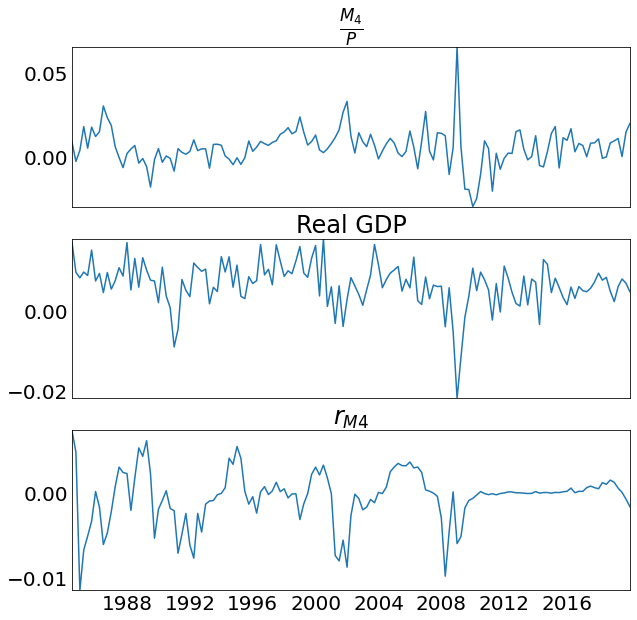

In [32]:
plt.rcParams.update({"font.size" : 20})
fig = results.plot()
ax = fig.axes
num_ax = len(ax)
for i in range(num_ax):
    a = ax[i]
    a.tick_params(axis=u'both', which=u'both',length=0)    
    if i + 1 < num_ax:
        a.set_xticklabels([])

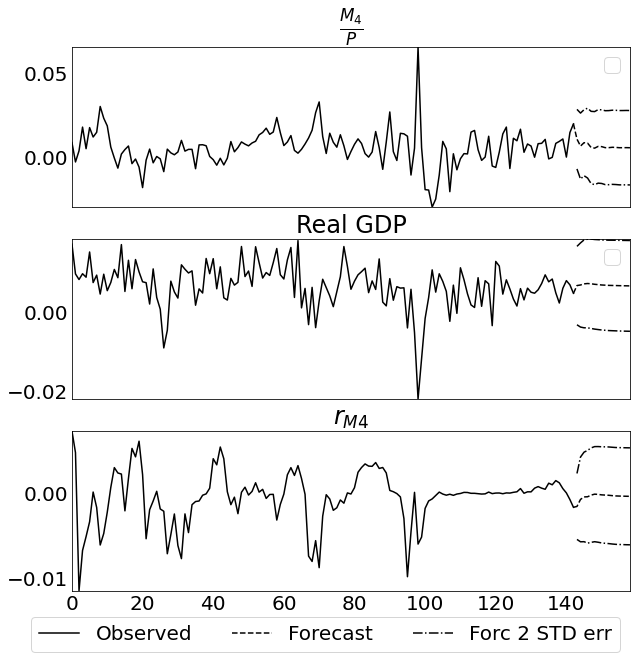

In [34]:
fig = results.plot_forecast(16)
ax = fig.axes
num_ax = len(ax)
for i in range(num_ax):
    a = ax[i]
    a.tick_params(axis=u'both', which=u'both',length=0)
    if i + 1 < num_ax:
        a.set_xticklabels([])
        a.legend([])
    else:
        a.legend(bbox_to_anchor=(1, -.1), ncol = 3)
#        a.set_xticklabels([str(x) for x in list(plot_data.index)[::4]], rotation = 90)
        

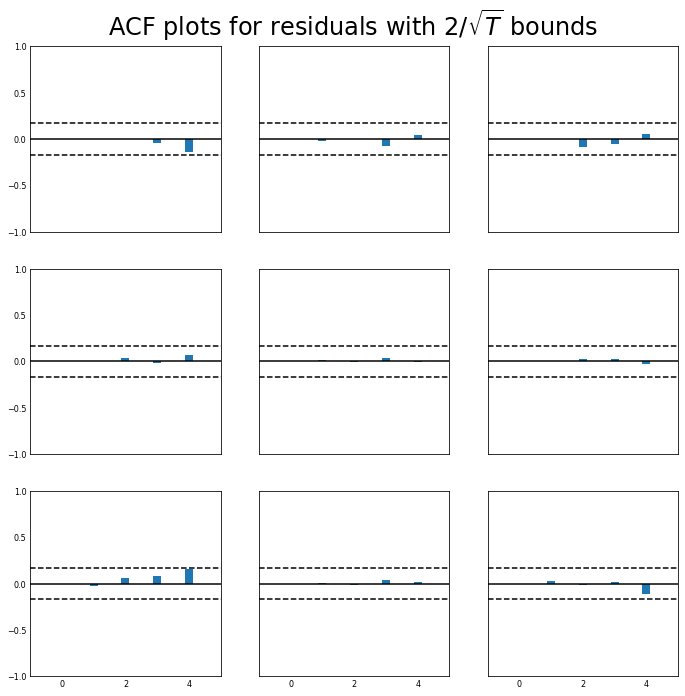

In [35]:
fig =results.plot_acorr(4)
ax = fig.axes
num_ax = len(ax)
for i in range(num_ax):
    a = ax[i]
    a.tick_params(axis=u'both', which=u'both',length=0)
    if i % 3 != 0:
        a.set_yticklabels([])
    if i <6:
        a.set_xticklabels([])


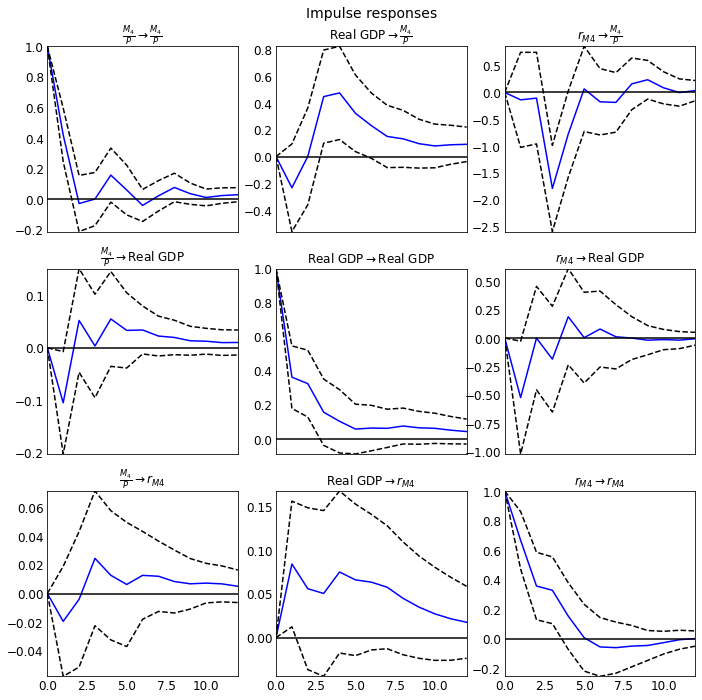

In [36]:
plt.rcParams.update({"font.size" : 12})
irf = results.irf(12)
fig = irf.plot(orth=False)
ax = fig.axes
num_ax = len(ax)
for i in range(num_ax):
    a = ax[i]
    a.tick_params(axis=u'both', which=u'both',length=0)    
        
#     if i + 1 < num_ax:
#         a.set_xticklabels([])

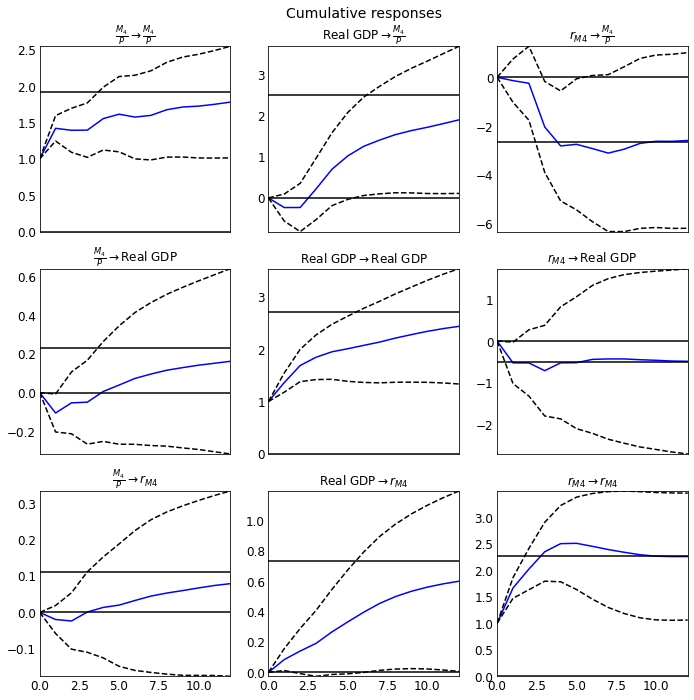

In [37]:
fig = irf.plot_cum_effects(orth=False)
ax = fig.axes
num_ax = len(ax)
for i in range(num_ax):
    a = ax[i]
    a.tick_params(axis=u'both', which=u'both',length=0)

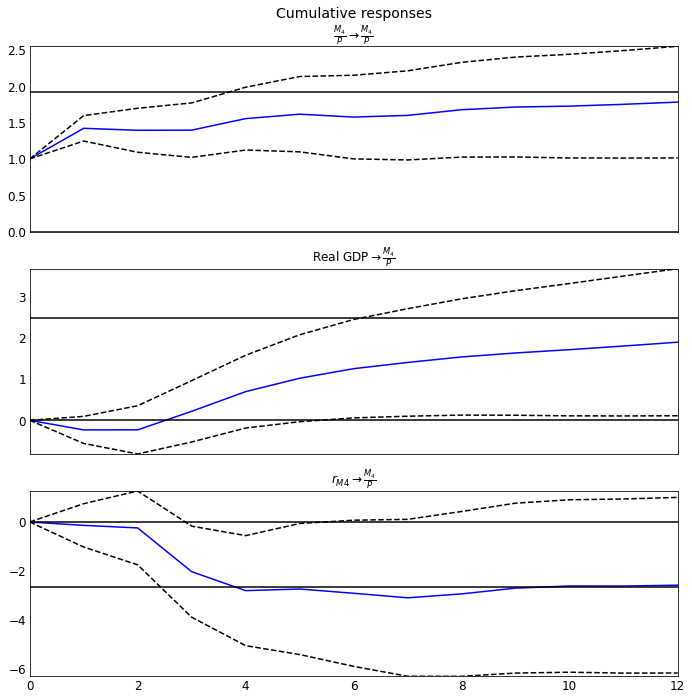

In [38]:
fig = irf.plot_cum_effects(response=keys[0])
ax = fig.axes
num_ax = len(ax)
for i in range(num_ax):
    a = ax[i]
    a.tick_params(axis=u'both', which=u'both',length=0)

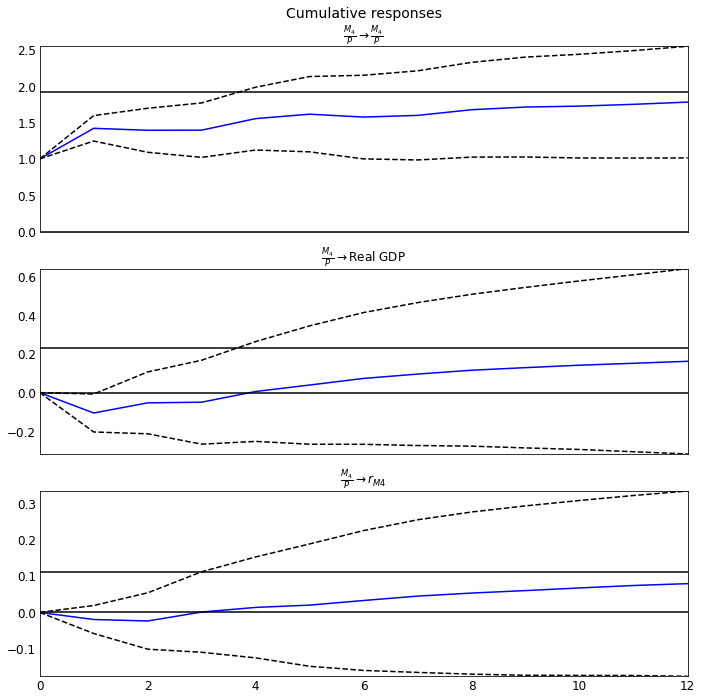

In [39]:
fig = irf.plot_cum_effects(impulse=keys[0])
ax = fig.axes
num_ax = len(ax)
for i in range(num_ax):
    a = ax[i]
    a.tick_params(axis=u'both', which=u'both',length=0)

If you are looking to expand the results, you might include a measure of inflation expectations implied by the array of interest rates across maturities, returns on equities, and a measure for market risk (e..g, VIX or maybe a more complete measure...). The key take away is that if demand for money is, in fact, a function of other factors, then it is stable *controlling* for those factors. $Warning:$: **Beware of problems with multicollinearity! Movements in macrovariables are highly correlated. If you use VIX, it will likely interact with S&P 500 returns since the indicator is calculated using htat data.**

### Money Demand and Balance of Payments

Excessive expansion of credit will tend to displace reserves, leading to importation of foreign produced goods. 

$$M_d = Pf(y,r)$$

$$M_s = D+  R$$

$$M_d = D + R$$

$$R = M_d - D$$

Notice that if domestic credit expands beyond demand to hold money, the flow of reserves will become negative, thus indicating a current account deficit. Notice that this is different than the case of positive net foreign investment in a country that promotes a current account deficit. In this case, domestic expansion moves beyond levels merited by gold or currency reserves. It is important to recognize that domestic credit is a substitute for holding reserves domestically, but only reserves can be used to purchase foreign produced goods. With excess funds, newly create money is spent on foreign goods using reserves rather than domestic credit.